In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

# Упражнение 10.1

В разделе «Системы и свертка» свертка описана как сумма сдвинутых и масштабированных копий сигнала.

В разделе «Акустическая характеристика» умножение ДПФ сигнала на передаточную функцию соответствует круговой свертке, но при верности предположения о периодичности сигнала.

In [ ]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

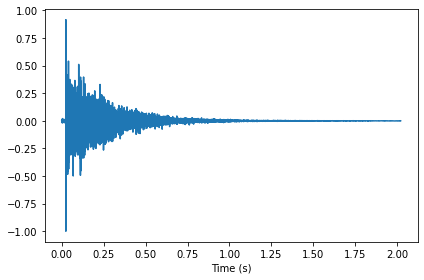

In [ ]:
from thinkdsp import read_wave, decorate

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [ ]:
response.make_audio()

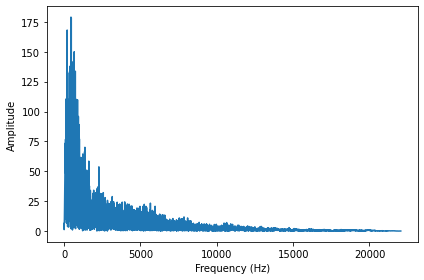

In [ ]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [ ]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

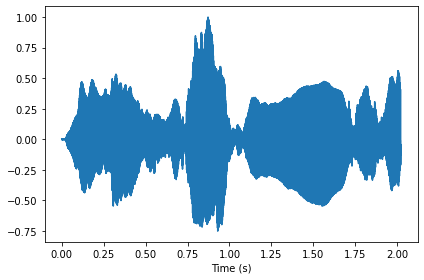

In [ ]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

In [ ]:
violin.make_audio()

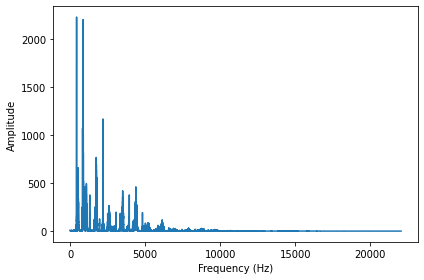

In [ ]:
spectrum = violin.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [ ]:
output = (spectrum * transfer).make_wave()
output.normalize()

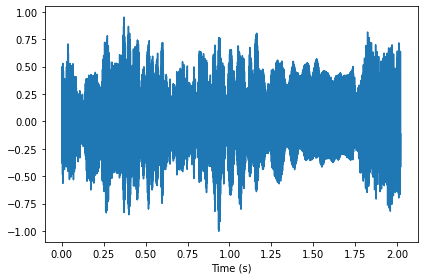

In [ ]:
output.plot()
decorate(xlabel='Time (s)')

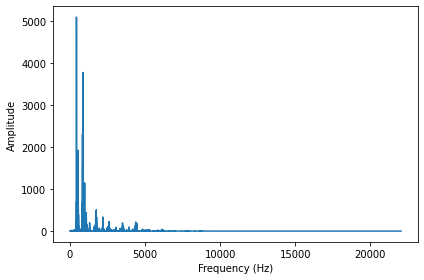

In [ ]:
spectrum = output.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [ ]:
output.make_audio()

В результате можно заметить, что на выходе, в начале фрагмента, слышна лишняя нота, «затекшая» из конца этого фрагмента.

Для данной проблемы имеется стандартное решение. Если перед вычислением ДПФ добавить достаточно нулей в конец сигнала, то эффекта «заворота» можно избежать.

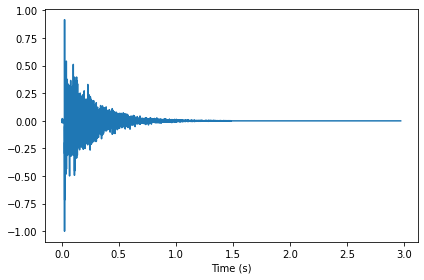

In [ ]:
response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

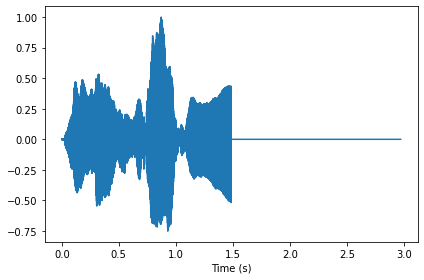

In [ ]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

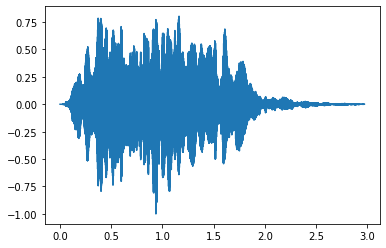

In [ ]:
spectrum = violin.make_spectrum()
transfer = response.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

In [ ]:
output.make_audio()

# Упражнение 10.2

Библиотека Open AIR (свободный эфир) предоставляет коллекцию импульсных характеристик.

Была скачана одна из импульсных характеристик.

In [ ]:
if not os.path.exists('stalbans_a_mono.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav

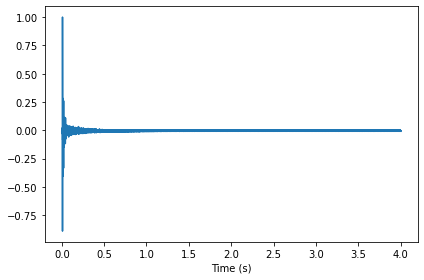

In [ ]:
response = read_wave('stalbans_a_mono.wav')

start = 0
duration = 4
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [ ]:
response.make_audio()

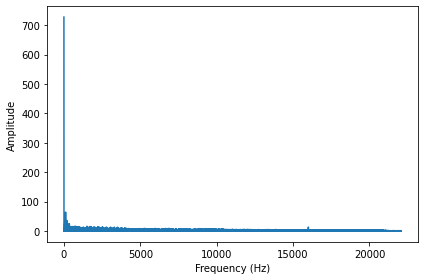

In [ ]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Были найдены короткие записи с той же частотой дискретизации, что и у скачанной
импульсной характеристики.

In [ ]:
!wget -O singing.wav https://github.com/BozhkoAV/ThinkDSP/blob/master/code/singing.wav?raw=true

--2022-05-22 20:38:48--  https://github.com/BozhkoAV/ThinkDSP/blob/master/code/singing.wav?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BozhkoAV/ThinkDSP/raw/master/code/singing.wav [following]
--2022-05-22 20:38:48--  https://github.com/BozhkoAV/ThinkDSP/raw/master/code/singing.wav
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/singing.wav [following]
--2022-05-22 20:38:48--  https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/singing.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting resp

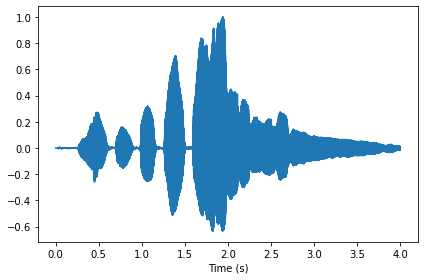

In [ ]:
wave = read_wave('singing.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [ ]:
wave.make_audio()

Двумя способами было смоделировано звучание записи в том пространстве, где была измерена импульсная характеристика:

1. Сверткой самой записи с импульсной характеристикой

In [ ]:
convolved = wave.convolve(response)
convolved.normalize()
convolved.make_audio()

2. Умножением ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике.

In [ ]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)

(88201, 88201)

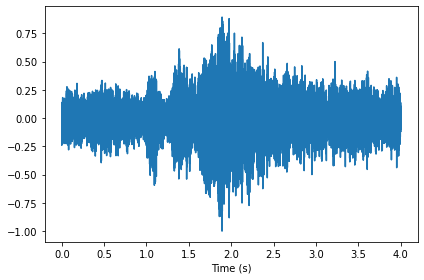

In [ ]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()
decorate(xlabel='Time (s)')

In [ ]:
output.make_audio()